In [1]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random


% matplotlib inline

In [2]:
# The goal is to implement kmeans clustering which is based on Lloyd's algorithm
# a :We start by placing centroids randomly on the plane
# b : Then we assign each point to the centroid closest to it
# c :Then we reassign the centroid to become the center (mean) of that cluster
# d: repeat steps a thru c until the centroids arent moving

In [3]:
# We build the python code with a simple dataset and then test it on the tetra data

In [4]:
# First we have to import the tetra dataset using pandas

In [5]:
# The set starts at the 4th row

In [6]:
tetra = pd.read_table('Tetra.lrn', skiprows = 3, usecols= [1,2,3] )

In [7]:
#Eyeball the data to make sure it loaded

In [8]:
tetra[:5] 

,C1,C2,C3
0,1.295428,0.050829,-0.385217
1,1.409178,-0.035191,-0.251980
2,1.096803,0.246365,-0.415011
3,1.463328,0.265354,-0.513488
4,1.603284,0.080577,-0.470257


In [9]:
np.mean(tetra)

C1    0.116703
C2   -0.065265
C3    0.023340
dtype: float64

In [10]:
#Do we need to normalize?

In [11]:
# Let's see how well the data is distributed

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000950B0F0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000004C18A58>]], dtype=object)

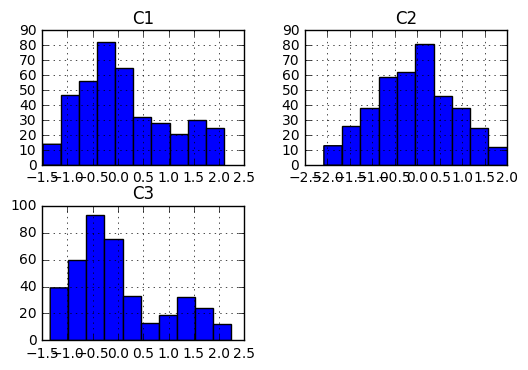

In [12]:
tetra.hist()

In [13]:
# Not perfect, but still good enough not to need normalization

In [14]:
#########

In [15]:
# Let's build a test dataset to test our functions

In [16]:
x1= np.array([1,1,1,8,8,8,12,12,12])

In [17]:
x2 = np.array([1.5,2,3,8.8,9,7,12.5,14,13])

In [18]:
x3= np.array([2,1.9,0.8,8.9,7,9,11,13,14])

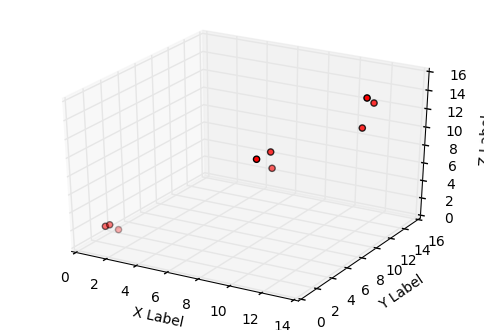

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, x3, c='r', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [20]:
# Now lets build the tools we need to put together the kmeans

In [21]:
# First we need to generate centroids

In [22]:
# The method I will use is to shuffle the data & pick k points at random to be our centroids 

In [23]:
#Put together an array from our data

In [24]:
testarray= np.column_stack((x1,x2,x3))

In [25]:
testarray

array([[  1. ,   1.5,   2. ],
       [  1. ,   2. ,   1.9],
       [  1. ,   3. ,   0.8],
       [  8. ,   8.8,   8.9],
       [  8. ,   9. ,   7. ],
       [  8. ,   7. ,   9. ],
       [ 12. ,  12.5,  11. ],
       [ 12. ,  14. ,  13. ],
       [ 12. ,  13. ,  14. ]])

In [26]:
np.shape(testarray)

(9, 3)

In [27]:
# shuffle the data, pick 3 rows , and make them our centroids

In [28]:
#Take the array of our data
#Shuffle it
#take k points as the centroids 


def initialize_centroids(dataarray,k):
    shuffled = np.copy(dataarray)
    np.random.shuffle(shuffled)
    centroids = shuffled[0:k,]
    return(centroids)

In [29]:
initialize_centroids(testarray,3)

array([[  1. ,   3. ,   0.8],
       [ 12. ,  14. ,  13. ],
       [  8. ,   8.8,   8.9]])

In [30]:
#Now we call the function and bind its output (which is our centroids) to the variable centroids
#We will be calling this variable a lot so don't screw it up
centroids = initialize_centroids(testarray,3)

In [31]:
centroids

array([[ 8. ,  8.8,  8.9],
       [ 8. ,  7. ,  9. ],
       [ 1. ,  2. ,  1.9]])

In [32]:
# First we will build the tools we need to give each point a label
#This constitutes:
    # A function to calculate the distance between a point and another point (in this case a centroid)
    # A function to determine what's the closest centroid to a point
    # A loop that calculates for each point how far it is from each centroid, and then assigns it a label to the closest one

In [33]:
# Distance between a point and another point (in this case a centroid)

In [34]:
def dist_between_2_points(point1,point2):   
    return np.sqrt(np.sum((point1-point2)**2))




In [35]:
dist_between_2_points(testarray[0],centroids[0])

12.243365550370537

In [36]:
# Find the closest centroid to a point and reference it by which element of the centroids array it is

In [37]:
def closest_centroid_for_this_point(this_point,centroid_array):
    distances_for_this_point = []
    for i in range(len(centroid_array)):
        distances_for_this_point.append(dist_between_2_points(this_point,centroid_array[i]))
    return(distances_for_this_point.index(min(distances_for_this_point)))

In [38]:
# Test the function by feeding it a point and our array of centroids

In [39]:
closest_centroid_for_this_point(testarray[0],centroids)

2

In [40]:
# Now we need a function that calculates the nearest centroid for each data point,
# and then compliles a list of labels 

In [41]:
# Returns a list containing all labels for all points
def assign_labels(array_of_points,centroid_array):
    labels = []
    for i in range(array_of_points.shape[0]):
        labels.append(closest_centroid_for_this_point(array_of_points[i],centroid_array=centroid_array))
    return(labels)

In [42]:
assign_labels(testarray,centroids)

[2, 2, 2, 0, 0, 1, 0, 0, 0]

In [43]:
# This command generates the list of labels based on current centroid positions
# It will be called when determining new centroid positions

In [44]:
current_labels = assign_labels(testarray,centroids)

In [45]:
# now we need functions to get geometric mean of a set of points (will be used to calculate the new centroid of a cluster)

In [46]:
def geom_centroid_of_points(set_of_points):
    return((set_of_points).mean(axis=0))

In [47]:
#to test this: I choose 3 points to be our array and one centroid to be that centroid 

In [48]:
testarray[0:3]

array([[ 1. ,  1.5,  2. ],
       [ 1. ,  2. ,  1.9],
       [ 1. ,  3. ,  0.8]])

In [49]:
geom_centroid_of_points(testarray[0:3])

array([ 1.        ,  2.16666667,  1.56666667])

In [50]:
# Now we need a way to change the position of a centroid to the geometric mean of the points near it

In [51]:
# get array containing the points near a centroid

In [52]:
def findindexes_in_cluster(list_of_values, target_value):
    return [i for i, x in enumerate(list_of_values) if x==target_value ]

In [53]:
# Test, which points in the dataset belong to cluster 0 ?
findindexes_in_cluster(current_labels,0)

[3, 4, 6, 7, 8]

In [54]:
# Now we need a function that when we give it a cluster, retrieves the points that belong to that cluster,
# then returns thier geometric mean

In [55]:
#indexes_for_cluster_0 = findindexes_in_cluster(current_labels,0)

In [56]:
#testarray[indexes_for_cluster_0,:]

In [57]:
#testarray[[1,2,3],:]

In [58]:
#geom_centroid_of_points(testarray[indexes_for_cluster_0,:])

In [59]:
def new_position_for_centroid(index_of_centroid,dataset):
    indexes_for_nearby_points = findindexes_in_cluster(current_labels,index_of_centroid)
    nearby_points = dataset[indexes_for_nearby_points,:]
    mean_of_nearby_points = geom_centroid_of_points(nearby_points)
    return(mean_of_nearby_points)

In [60]:
# Test by giving it a centroid 0 and making sure it takes that centroid index, finds it's reference in the labels list,
# then then gets the mean of all points that share that label reference and returns it 
new_position_for_centroid(0,testarray)

array([ 10.4 ,  11.46,  10.78])

In [61]:
# now we need a function that generates an array of new centroid positions

In [62]:
# loop to update centroid positions

In [63]:
for i in range(centroids.shape[0]):
    new_centroids = np.empty_like(centroids)
    new_centroids[i] = new_position_for_centroid(i,testarray)

In [64]:
new_centroids

array([[ 10.4       ,  11.46      ,  10.78      ],
       [  0.        ,   0.        ,   0.        ],
       [  1.        ,   2.16666667,   1.56666667]])

In [65]:
# now we have built all the tools we need

In [66]:
# its time to put them all together into a kmeans function

In [67]:
# I will repeat all the functions here so we have them all in one place

In [68]:
#Take the array of our data
#Shuffle it
#take the first k points as the centroids 


def initialize_centroids(dataarray,k):
    shuffled = np.copy(dataarray)
    np.random.shuffle(shuffled)
    centroids = shuffled[0:k,]
    return(centroids)

In [69]:
def dist_between_2_points(point1,point2):   
    return np.sqrt(np.sum((point1-point2)**2))

In [70]:
def closest_centroid_for_this_point(this_point,centroid_array):
    distances_for_this_point = []
    for i in range(len(centroid_array)):
        distances_for_this_point.append(dist_between_2_points(this_point,centroid_array[i]))
    return(distances_for_this_point.index(min(distances_for_this_point)))

In [71]:
# Returns a list containing all labels for all points
def assign_labels(array_of_points,centroid_array):
    labels = []
    for i in range(array_of_points.shape[0]):
        labels.append(closest_centroid_for_this_point(array_of_points[i],centroid_array=centroid_array))
    return(labels)

In [72]:
def geom_centroid_of_points(set_of_points):
    return((set_of_points).mean(axis=0))

In [73]:
def findindexes_in_cluster(list_of_values, target_value):
    return [i for i, x in enumerate(list_of_values) if x==target_value ]

In [74]:
def new_position_for_centroid(index_of_centroid,dataset,current_labels):
    indexes_for_nearby_points = findindexes_in_cluster(current_labels,index_of_centroid)
    nearby_points = dataset[indexes_for_nearby_points,:]
    mean_of_nearby_points = geom_centroid_of_points(nearby_points)
    return(mean_of_nearby_points)

In [75]:
def kmeans(dataarray,k,iterations):
    #first initialize the centroids
    centroids = initialize_centroids(dataarray,k)
    
    #
    for i in range(0,iterations):
        #based on where the centroids currently are, assign a label for each data point to its nearest centroid 
        current_labels = assign_labels(dataarray,centroids)
        #Based on these newly assigned labels moves the centroids to thier new positions
        #generate an empty array to house the new centroids, then populate that array with the new centroid positions
        new_centroids = np.empty_like(centroids)
        for i in range(centroids.shape[0]):
            new_centroids[i] = new_position_for_centroid(i,dataarray, current_labels)
        # If the centroids haven't changed, stop 
        if np.array_equal(centroids,new_centroids):
            print("model converged")
            break
        #assign the new centroid positions to the centroids
        centroids = new_centroids  
    return(current_labels)

In [76]:
# Now let's test the kmeans function using our testarray

In [77]:
# It should return a vector of cluster assignments

In [78]:
del(current_labels)

In [79]:
# use our test array , use 3 centroids , run for 10 iterations
current_labels = kmeans(testarray,3,50)

model converged


In [ ]:
# This should give us a vector of cluster assignments

In [80]:
current_labels

[0, 0, 0, 2, 2, 2, 1, 1, 1]

In [81]:
# Success!!

In [82]:
# Now let's plot our results to see if it grouped correctly

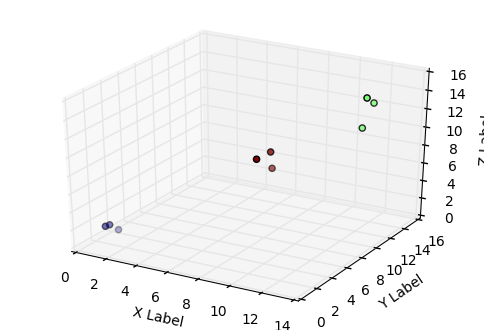

In [83]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X = testarray[:,0]
Y = testarray[:,1]
Z = testarray[:,2]



ax.scatter(X ,Y, Z,  c=current_labels, marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [84]:
# Now Let's use our kmeans algo to cluster the tetra data

In [85]:
tetra[:5]

,C1,C2,C3
0,1.295428,0.050829,-0.385217
1,1.409178,-0.035191,-0.251980
2,1.096803,0.246365,-0.415011
3,1.463328,0.265354,-0.513488
4,1.603284,0.080577,-0.470257


In [ ]:
# Let's convert the dataset into a numpy array so it doesn't screw us when we try to do matrix operations

In [86]:
numpytetra = tetra.as_matrix()

In [87]:
numpytetra

array([[ 1.295428,  0.050829, -0.385217],
       [ 1.409178, -0.035191, -0.25198 ],
       [ 1.096803,  0.246365, -0.415011],
       ..., 
       [-0.726249, -0.103244,  0.6943  ],
       [ 0.808596, -0.49264 ,  1.64937 ],
       [ 0.749291, -0.44784 ,  0.863555]])

In [ ]:
#Clear out the labels variable

In [88]:
del(current_labels)

In [89]:
current_labels = kmeans(numpytetra,3,100)

model converged


In [90]:
current_labels

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [91]:
# Now let's plot the tetra data with the clusterings to see what happened

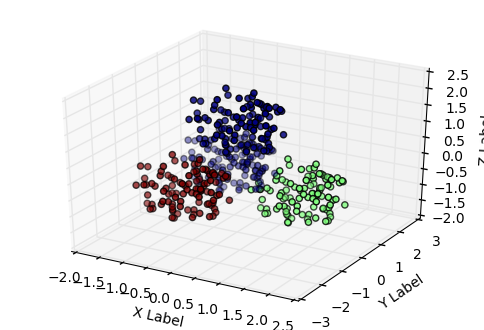

In [92]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X = numpytetra[:,0]
Y = numpytetra[:,1]
Z = numpytetra[:,2]



ax.scatter(X ,Y, Z,  c=current_labels, marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [93]:
#Success!!